# Import All Nessesary Modules

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import cv2
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm 
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import splitfolders

# Data Set Spliting 

In [2]:
splitfolders.ratio("Dataset/", output="Output/",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

Copying files: 992 files [00:04, 212.47 files/s]


# Decleared the Dimensions and Data info

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 128
CHANNELS=3
EPOCHS=50

# Train, Validation, Test Data Preparation 

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255
)
train_dataset = train_datagen.flow_from_directory(
        'Output/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='binary'
)

Found 793 images belonging to 2 classes.


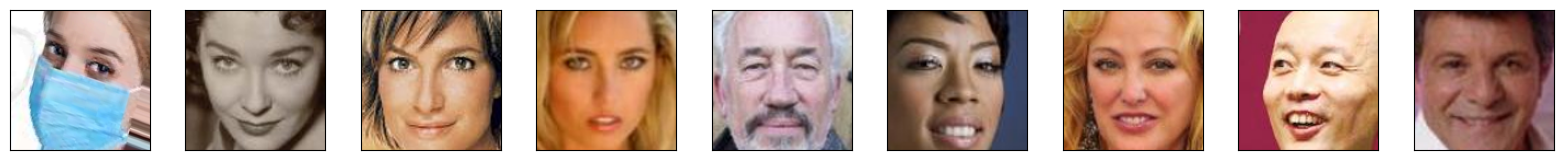

In [5]:
#######images and Labels###############
images, labels =next(train_dataset)
n = 9  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
count=0
for image_batch, label_batch in train_dataset:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.52156866 0.3019608  0.10196079]
  [0.5137255  0.29411766 0.09019608]
  [0.5058824  0.2784314  0.07450981]
  ...
  [0.5686275  0.41176474 0.16862746]
  [0.5647059  0.40784317 0.16470589]
  [0.5568628  0.40000004 0.15686275]]

 [[0.5254902  0.30588236 0.10588236]
  [0.5176471  0.29803923 0.09411766]
  [0.5058824  0.28235295 0.07843138]
  ...
  [0.54901963 0.3921569  0.14901961]
  [0.54901963 0.3921569  0.14901961]
  [0.54901963 0.3921569  0.15294118]]

 [[0.5294118  0.30980393 0.1137255 ]
  [0.52156866 0.3019608  0.09803922]
  [0.50980395 0.28627452 0.08235294]
  ...
  [0.56078434 0.4039216  0.16078432]
  [0.5686275  0.41176474 0.16862746]
  [0.57254905 0.4156863  0.17254902]]

 ...

 [[0.05882353 0.00784314 0.        ]
  [0.05490196 0.00392157 0.        ]
  [0.05490196 0.00392157 0.        ]
  ...
  [0.29803923 0.12156864 0.01176471]
  [0.3372549  0.15686275 0.04705883]
  [0.3647059  0.18039216 0.07058824]]

 [[0.04705883 0.00392157 0.        ]
  [0.04313726 0.         0.        ]


In [7]:
train_dataset.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [8]:
class_names = list(train_dataset.class_indices.keys())
class_names

['WithMask', 'WithoutMask']

In [9]:
validation_datagen = ImageDataGenerator(
        rescale=1./255)
validation_dataset = validation_datagen.flow_from_directory(
        'Output/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='binary'
)

Found 98 images belonging to 2 classes.


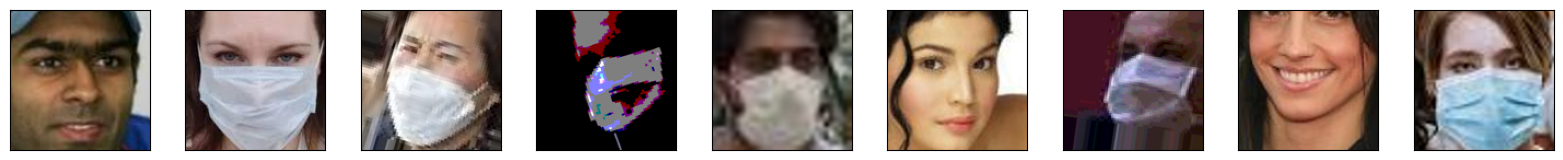

In [10]:
#######images and Labels###############
images, labels =next(validation_dataset)
n = 9  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
for image_batch, label_batch in validation_dataset:
    print(image_batch[0])
    break

[[[0.08235294 0.15294118 0.24313727]
  [0.07843138 0.14509805 0.23529413]
  [0.07843138 0.14509805 0.23529413]
  ...
  [0.08627451 0.13725491 0.19607845]
  [0.08627451 0.13725491 0.19607845]
  [0.08627451 0.13725491 0.19607845]]

 [[0.08235294 0.15294118 0.24705884]
  [0.07843138 0.14509805 0.23529413]
  [0.07843138 0.14509805 0.23529413]
  ...
  [0.08627451 0.13725491 0.19607845]
  [0.08627451 0.13725491 0.19607845]
  [0.08627451 0.13725491 0.19607845]]

 [[0.08627451 0.15686275 0.2509804 ]
  [0.07843138 0.14901961 0.23529413]
  [0.07843138 0.14509805 0.23529413]
  ...
  [0.08627451 0.13725491 0.19607845]
  [0.08627451 0.13725491 0.19607845]
  [0.08627451 0.13725491 0.19607845]]

 ...

 [[0.08627451 0.1254902  0.1764706 ]
  [0.08627451 0.1254902  0.1764706 ]
  [0.08627451 0.1254902  0.1764706 ]
  ...
  [0.39607847 0.32156864 0.3019608 ]
  [0.25882354 0.19215688 0.19215688]
  [0.22352943 0.16078432 0.16078432]]

 [[0.08235294 0.12156864 0.17254902]
  [0.07450981 0.10980393 0.16862746]


In [12]:
test_datagen = ImageDataGenerator(
        rescale=1./255)

test_dataset = test_datagen.flow_from_directory(
        'Output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='binary'
)

Found 101 images belonging to 2 classes.


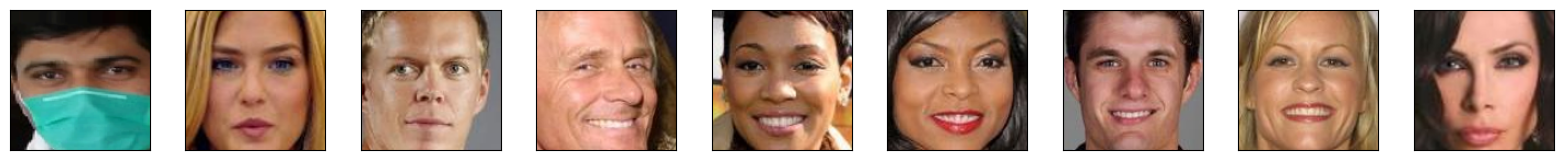

In [13]:
#######images and Labels###############
images, labels =next(test_dataset)
n = 9  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
for image_batch, label_batch in test_dataset:
    print(image_batch[0])
    break

[[[0.12156864 0.11764707 0.17254902]
  [0.12156864 0.11764707 0.17254902]
  [0.12156864 0.11764707 0.17254902]
  ...
  [0.5058824  0.5294118  0.8588236 ]
  [0.49803925 0.5176471  0.8470589 ]
  [0.4901961  0.50980395 0.8313726 ]]

 [[0.1137255  0.1137255  0.16078432]
  [0.11764707 0.1137255  0.16470589]
  [0.11764707 0.1137255  0.16470589]
  ...
  [0.50980395 0.5294118  0.8588236 ]
  [0.5019608  0.52156866 0.85098046]
  [0.49411768 0.5058824  0.8352942 ]]

 [[0.10980393 0.10980393 0.15686275]
  [0.1137255  0.1137255  0.15686275]
  [0.1137255  0.1137255  0.16078432]
  ...
  [0.50980395 0.5294118  0.8588236 ]
  [0.5058824  0.52156866 0.85098046]
  [0.49803925 0.5058824  0.83921576]]

 ...

 [[0.23137257 0.22352943 0.27450982]
  [0.227451   0.22352943 0.27058825]
  [0.22352943 0.21568629 0.25490198]
  ...
  [0.3921569  0.35686275 0.7686275 ]
  [0.39607847 0.36078432 0.7725491 ]
  [0.4039216  0.36078432 0.7725491 ]]

 [[0.23137257 0.227451   0.2901961 ]
  [0.227451   0.22352943 0.28235295]


In [33]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

# Model Create 

In [90]:
model = Sequential()

# Block-1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(1,kernel_initializer='he_normal'))
model.add(Activation('sigmoid'))

In [91]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 activation_66 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 batch_normalization_60 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                               
                                                                 
 conv2d_49 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 activation_67 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 batch_normalization_61 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                    

In [92]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True, show_layer_names=True)

# Display the image
Image(filename='convnet.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


FileNotFoundError: [Errno 2] No such file or directory: 'convnet.png'

In [93]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [94]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [95]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [96]:
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=METRICS
)

In [97]:
history = model.fit(
    train_dataset,
    batch_size=32,
    validation_data=validation_dataset,
    callbacks=[lrd,mcp,es],
    verbose=1,
    epochs=5,
)

Epoch 1/5
25/25 [==============================] - ETA: 0s - loss: 0.4134 - accuracy: 0.8310 - precision: 0.8354 - recall: 0.8354 - auc: 0.9022 - f1_score: 0.8360

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 75s 3s/step - loss: 0.4134 - accuracy: 0.8310 - precision: 0.8354 - recall: 0.8354 - auc: 0.9022 - f1_score: 0.8360 - val_loss: 0.7282 - val_accuracy: 0.7143 - val_precision: 0.6719 - val_recall: 0.8600 - val_auc: 0.7821 - val_f1_score: 0.8080 - lr: 0.0010
Epoch 2/5
25/25 [==============================] - 70s 3s/step - loss: 0.2754 - accuracy: 0.8865 - precision: 0.8894 - recall: 0.8894 - auc: 0.9536 - f1_score: 0.8855 - val_loss: 2.9535 - val_accuracy: 0.5102 - val_precision: 0.5102 - val_recall: 1.0000 - val_auc: 0.6562 - val_f1_score: 0.5092 - lr: 0.0010
Epoch 3/5
25/25 [==============================] - 69s 3s/step - loss: 0.1936 - accuracy: 0.9269 - precision: 0.9145 - recall: 0.9459 - auc: 0.9762 - f1_score: 0.9291 - val_loss: 2.1232 - val_accuracy: 0.5204 - val_precision: 0.5155 - val_recall: 1.0000 - val_auc: 0.7908 - val_f1_score: 0.6723 - lr: 0.0010
Epoch 4/5
25/25 [==============================] - 70s 3s/step - loss: 0.1567 - accura

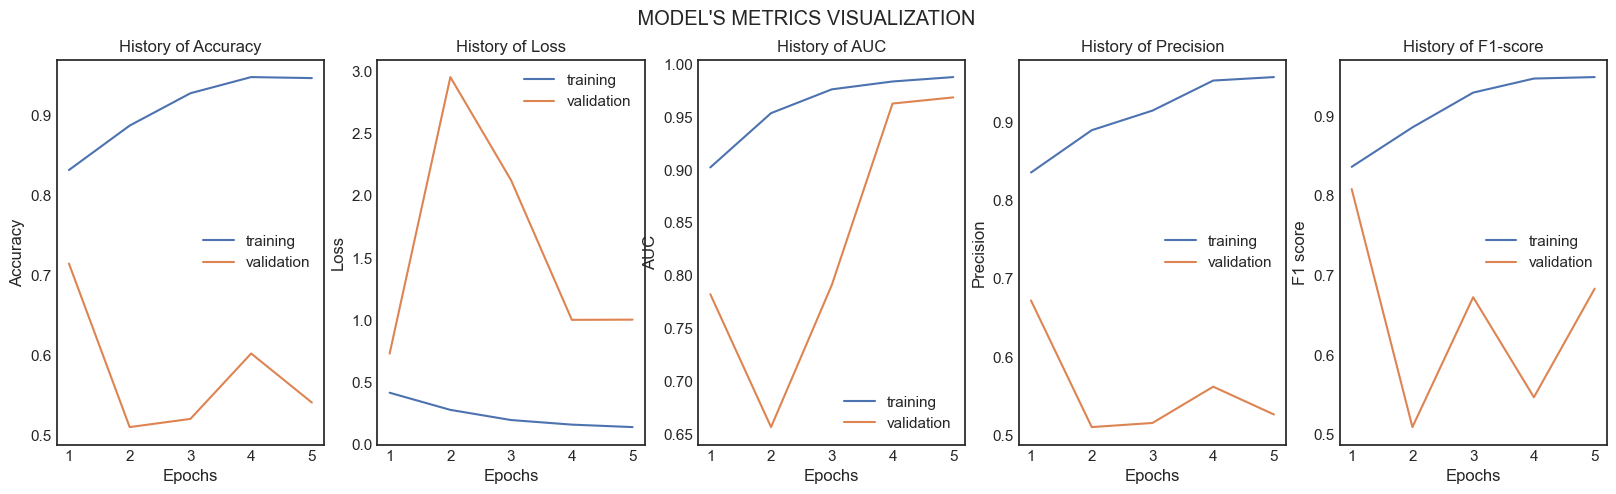

In [98]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )


In [99]:
score = model.evaluate(test_dataset, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

4/4 [==============================] - 2s 423ms/step - loss: 0.8828 - accuracy: 0.5644 - precision: 0.5417 - recall: 1.0000 - auc: 0.9810 - f1_score: 0.6715
Test loss: 0.882815420627594
Test accuracy: 0.5643564462661743


In [100]:
predictions = model.predict(test_dataset,verbose=1)
import numpy as np
class_index = test_dataset.classes
pred = predictions.argmax(axis=1)
print(pred)

4/4 [==============================] - 2s 408ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [101]:
print(accuracy_score(class_index,pred))

cm = confusion_matrix(class_index,pred)
print(cm)

0.48514851485148514
[[49  0]
 [52  0]]


4/4 [==============================] - 2s 413ms/step


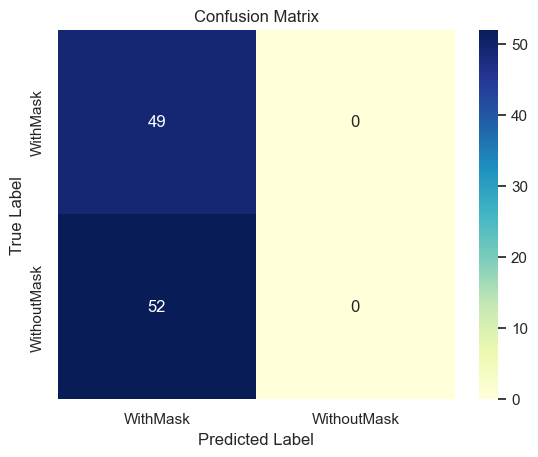

In [102]:
validation_labels = test_dataset.classes
validation_pred_probs = model.predict(test_dataset)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_dataset.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_3780\128096471.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


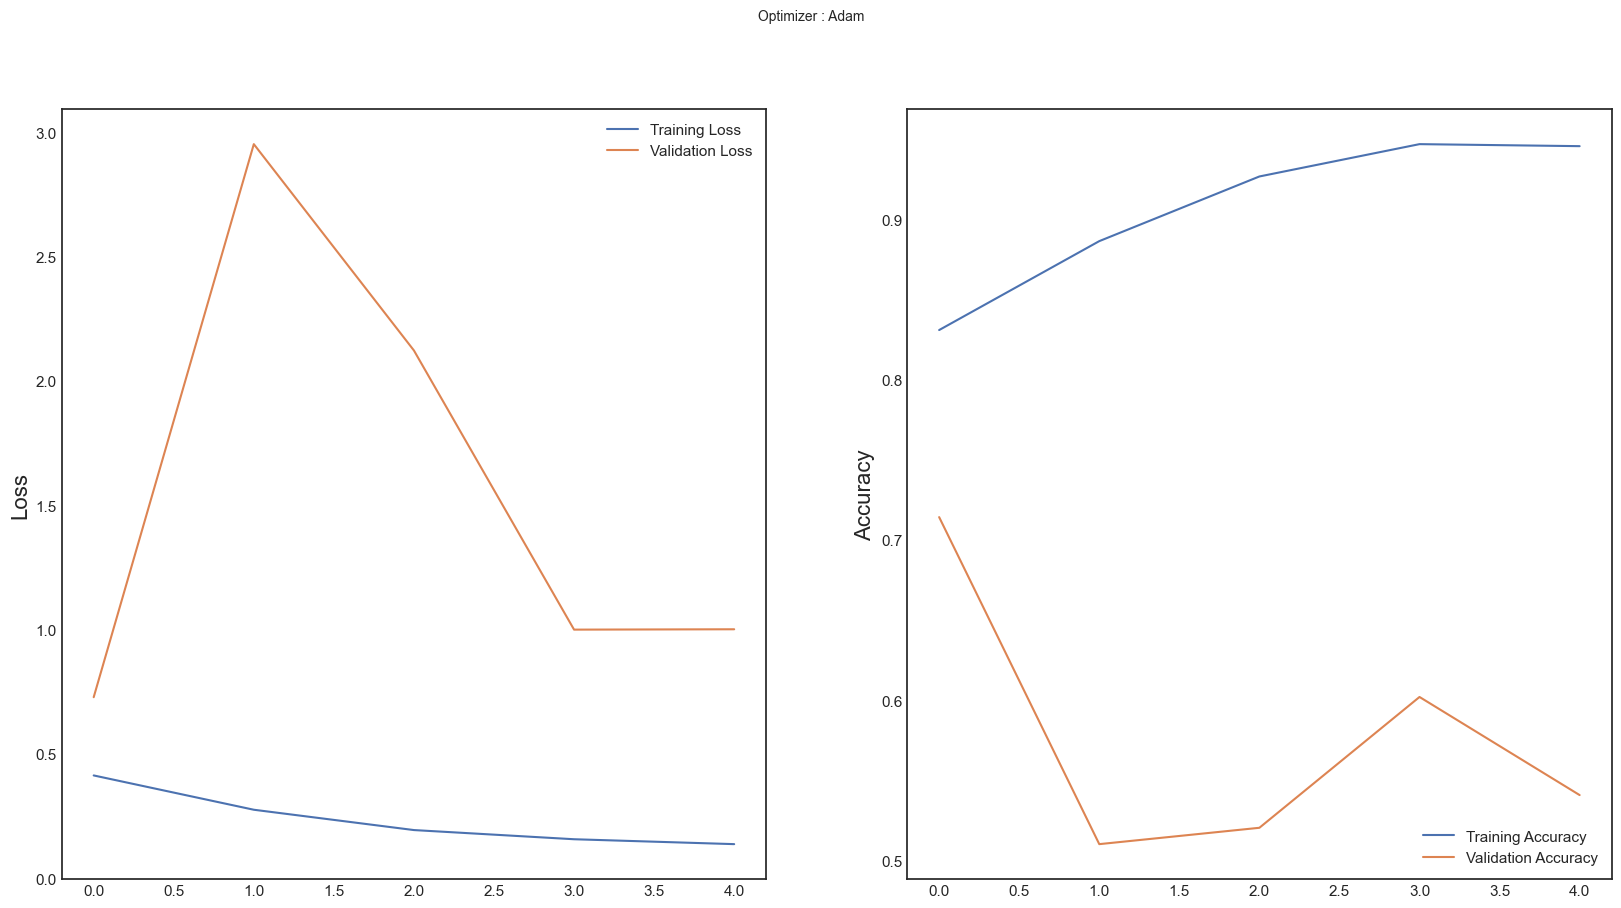

In [103]:
plt.style.use('seaborn-white')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [104]:
model.save('my_model.h5')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [133]:
Categories = {0: "WithMask", 1: "WithoutMask"}

In [142]:
import cv2

def prepare(filepath):
    IMG_SIZE = 128
    # Read the image in color (BGR format)
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    # Resize the image
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    # Reshape the image to include the color channels (height, width, channels)
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # 3 channels for RGB


1/1 [==============================] - 0s 50ms/step
[[0.93020195]]
WithMask
The above expression is:
93.02 %  WithMask


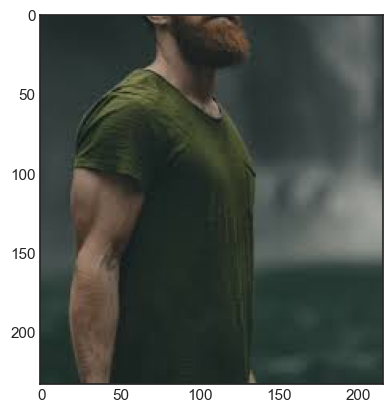

In [143]:
img = plt.imread("test.jpg")
plt.imshow(img)
path = "test.jpg"
prediction = model.predict(prepare(path)/255)
print(prediction)
label=prediction.argmax()
label
print(Categories[label])
i = 0
print("The above expression is:")
for perc in prediction[0]:
    print(round(perc*100, 2),"% ",Categories[i])
    i+= 1

1/1 [==============================] - 0s 50ms/step


Text(0.5, 1.0, 'WithMask')

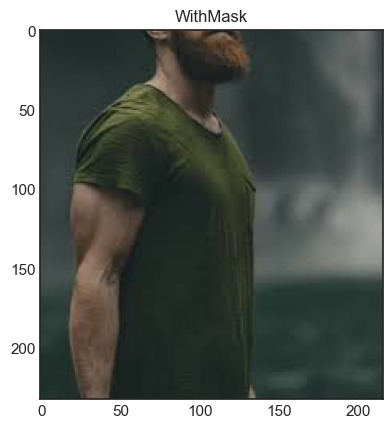

In [144]:
prediction = model.predict(prepare(path)/255)
label = prediction.argmax()
plt.imshow(img)
plt.title(Categories[label])

In [145]:
prediction = model.predict(prepare(path)/255)
prediction

1/1 [==============================] - 0s 50ms/step


array([[0.93020195]], dtype=float32)

# Another Way Of Prediction

In [146]:
import pathlib
import numpy as np
#turn our training path into a python path
data_dir= pathlib.Path('Output//train/')
#created a classnames from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['WithMask' 'WithoutMask']


In [147]:
def load_and_prep_image(filename, img_shape=IMAGE_SIZE):
 
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [150]:
def pred_and_plot(model, filename, class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  # Get the predicted class
  pred_class = Categories[class_names[int(tf.round(pred)[0][0])]]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 49ms/step


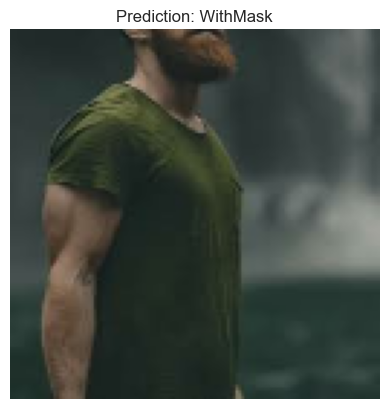

In [151]:
pred_and_plot(model,'test.jpg',class_index)

In [158]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('test.jpg', target_size = (128, 128,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)
print(train_dataset.class_indices)
if result[0][0] == 0:
    prediction = 'WithMask'
else:
    prediction = 'WithoutMask'
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[0.]]
{'WithMask': 0, 'WithoutMask': 1}
WithMask
